In [6]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.float_format',lambda x : '%.5f' % x)
pd.set_option('display.width', 500)    #设置整体宽度
from mtools import plot_fig
import matplotlib.pyplot as plt
import seaborn as sns
from mtools import monkey as mk

os.chdir('/data/wjk/Workspace/Datasets/IGR')
IGR_DIR = 'IGR230307'

In [3]:
all_imu_data = pd.read_hdf(f'IGRData/export/IGR230307/all_imu_data_IGR230307.h5', 'all_imu')
phones = all_imu_data['phone'].unique()
trips = all_imu_data['trip'].unique()
all_imu_data['AccU'] = all_imu_data['AccU'] - 9.8

In [4]:
all_imu_data.columns

Index(['timestamp', 'utcTimeMillis', 'elapsedRealtimeNanos', 'AccX', 'AccY', 'AccZ', 'UAccX', 'UAccY', 'UAccZ', 'Source', 'GraX', 'GraY', 'GraZ', 'AccE', 'AccN', 'AccU', 'GraE', 'GraN', 'GraU', 'OriSource', 'GysX', 'GysY', 'GysZ', 'UGysX', 'UGysY', 'UGysZ', 'GysE', 'GysN', 'GysU', 'MagX', 'MagY', 'MagZ', 'UMagX', 'UMagY', 'UMagZ', 'CMagX', 'CMagY', 'CMagZ', 'quaternionX', 'quaternionY', 'quaternionZ', 'quaternionW', 'rollDeg', 'pitchDeg', 'yawDeg', 'MagE', 'MagN', 'MagU', 'phone', 'trip'], dtype='object')

In [8]:
# Normalization
phones = all_imu_data['phone'].unique()
trips = all_imu_data['trip'].unique()
all_imu_data['AccU'] = all_imu_data['AccU'] - 9.8
acc_values = all_imu_data[['timestamp', 'AccE', 'AccN', 'AccU']].melt(id_vars=['timestamp'], value_vars=['AccE', 'AccN', 'AccU'])['value']
gyr_values = all_imu_data[['timestamp', 'GysE', 'GysN', 'GysU']].melt(id_vars=['timestamp'], value_vars=['GysE', 'GysN', 'GysU'])['value']
acc_values = np.abs(acc_values)
gyr_values = np.abs(gyr_values)
acc_des = acc_values.astype('float64').describe(percentiles=[.01, 0.1, 0.2, .25, .75, .8, 0.9, 0.99]).to_frame().T
gyr_des = gyr_values.astype('float64').describe(percentiles=[.01, 0.1, 0.2, .25, .75, .8, 0.9, 0.99]).to_frame().T
mk.magic_append([acc_des, gyr_des])
acc_des_list, gyr_des_list = mk.magic_get()

In [9]:
acc_des = pd.concat(acc_des_list)
gyr_des = pd.concat(gyr_des_list)
print(acc_des)
print(gyr_des)
print(acc_des/gyr_des)

pd.concat((acc_des, gyr_des, acc_des/gyr_des)).to_csv('Output/acc_gyr_des.csv', float_format='%.2f')

              count    mean     std     min      1%     10%     20%     25%     50%     75%     80%      90%      99%      max
value 1788096.00000 3.94219 4.39359 0.00000 0.02313 0.23380 0.47854 0.60725 1.43286 7.96665 9.17323 11.33012 13.51190 18.39157
              count    mean     std     min      1%     10%     20%     25%     50%     75%     80%     90%     99%     max
value 1788096.00000 0.26798 0.21280 0.00000 0.00414 0.04198 0.08478 0.10643 0.22035 0.37413 0.42089 0.56069 0.94981 1.86712
        count     mean      std     min      1%     10%     20%     25%     50%      75%      80%      90%      99%     max
value 1.00000 14.71053 20.64656 4.40246 5.58628 5.56934 5.64478 5.70555 6.50257 21.29379 21.79474 20.20745 14.22594 9.85022


In [14]:
print(sub_dfs[1])
phones

Empty DataFrame
Columns: [timestamp]
Index: []


array(['Mi11', 'Vivox60'], dtype=object)

In [15]:
trip_id = 0
pre_duration = 0
duration = 20
phones = ['Mi11']
sub_dfs = [all_imu_data['timestamp'][(all_imu_data['trip']==trips[trip_id])&(all_imu_data['phone']==phone)].to_frame() for phone in phones]
print(len(sub_dfs))
start_timestamps = [sub_df.iloc[0] for sub_df in sub_dfs]
start_timestamp = np.max(start_timestamps) + pre_duration*100
start_timestamp_inds = [np.where(sub_df==start_timestamp)[0][0] for sub_df in sub_dfs]
print(start_timestamp_inds)
sub_dfs = [all_imu_data[(all_imu_data['trip']==trips[trip_id])&(all_imu_data['phone']==phone)].iloc[ind:ind+duration*100] for phone,ind in zip(phones, start_timestamp_inds)]
sub_df = pd.concat(sub_dfs)

1
[0]


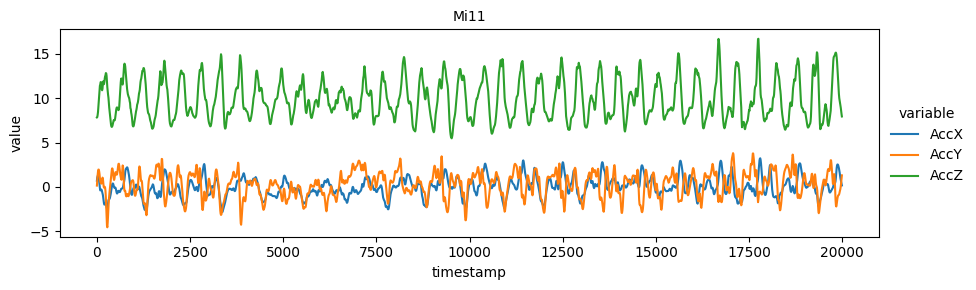

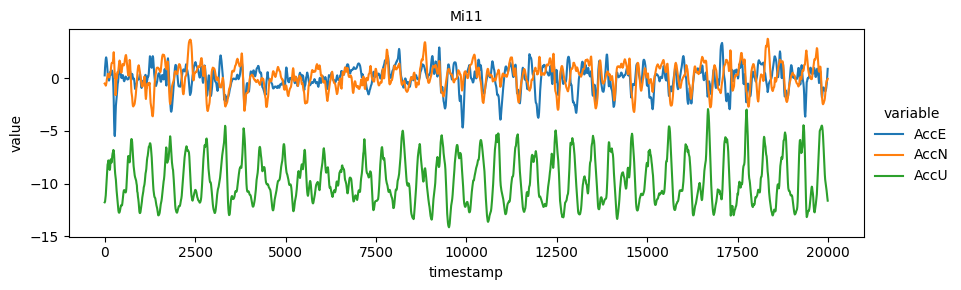

In [24]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'AccX', 'AccY', 'AccZ', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccX', 'AccY', 'AccZ'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

melt_sub_df = pd.melt(sub_df[['timestamp', 'AccE', 'AccN', 'AccU', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccE', 'AccN', 'AccU'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)
g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

In [ ]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'GyroX', 'GyroY', 'GyroZ', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccX', 'AccY', 'AccZ'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

melt_sub_df = pd.melt(sub_df[['timestamp', 'AccE', 'AccN', 'AccU', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['AccE', 'AccN', 'AccU'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)
g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()

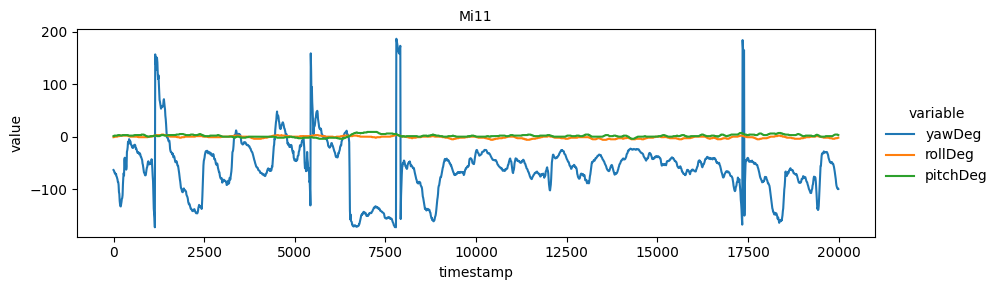

In [22]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'yawDeg', 'rollDeg', 'pitchDeg', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['yawDeg', 'rollDeg', 'pitchDeg'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)

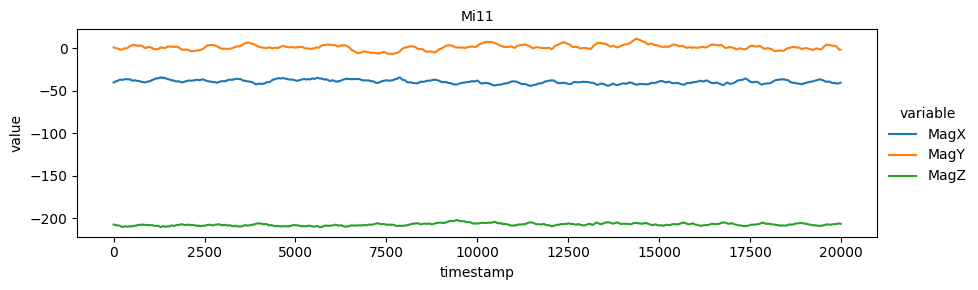

In [23]:
melt_sub_df = pd.melt(sub_df[['timestamp', 'MagX', 'MagY', 'MagZ', "phone"]], id_vars=['timestamp', 'phone'], value_vars=['MagX', 'MagY', 'MagZ'])
melt_sub_df['timestamp'] = melt_sub_df['timestamp']-np.min(melt_sub_df['timestamp'].values)

g = sns.FacetGrid(melt_sub_df, hue='variable', col="phone", despine=False, aspect=3)
g.map(sns.lineplot, "timestamp", "value")
g.set_titles("{col_name}")
g.add_legend()
plt.show()
# g.savefig('Figures/err_scatter_byphone_new.png', dpi=150, pad_inches=0.2)